In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def rotate(x, y, theta):
  return [
    np.cos(theta) * x + np.sin(theta) * y,
    -np.sin(theta) * x + np.cos(theta) * y
  ]

def get_verts(dy, theta, r, h):
  v = [
    [r, h],
    [r, -h],
    [-r, -h],
    [-r, h]
  ]
  rotated = [rotate(x, y, theta) for [x, y] in v]
  translated = [[x, y + dy + h] for [x, y] in rotated]
  return translated

def in_ground(verts):
  for [x, y] in verts:
    if y < 0:
      return True
  return False


def plot_verts(v):
  x = [v[0][0], v[1][0], v[2][0], v[3][0], v[0][0]]
  y = [v[0][1], v[1][1], v[2][1], v[3][1], v[0][1]]

  plt.plot(x, y)
  plt.axis('equal')


# Test plotting

In the initial stages of motion, for thin disks, the rightmost edge intersects the ground.

Let's ignore this...

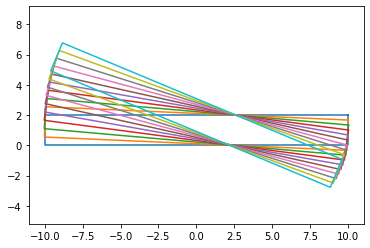

In [25]:
r = 10
h = 1
v = 1
m = 1
I = m * (3 * r ** 2 + 4 * h ** 2) / 12
omega = m * v * r / I

t = np.linspace(0, 1, 10)
y = v * t
theta = omega * t

for i in range(len(t)):
  plot_verts(get_verts(y[i], theta[i], r, h))

In [ ]:
def do_sim(h):
  r = 10
  v = 1
  m = 1
  I = m * (3 * r ** 2 + 4 * h ** 2) / 12
  omega = m * v * r / I
  eps = 0.8 # After bouncing, what fraction of velocity is left?

  y = 0
  theta = 0

  while True:
    verts = get_verts(y, theta, r, h)

    if v < 0 and in_ground(verts):
      # Perpendicular distance from impact point to centre of disk
      a  = np.sqrt(h**2 + r**2) * np.cos(theta + np.arctan(h / r))
      domega = (eps + 1) * abs(v) * a
    